In [164]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt

In [165]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [166]:
df_train = df_train.dropna()
df_train = df_train.reset_index()
df_train = df_train.drop(columns=['index'])
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [167]:

df_train.shape

(183, 12)

## Exploratory data analysis

In [168]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x = df_train['Sex']
df = pd.DataFrame(le.fit_transform(x),columns=['Sex'])
df_train['sex'] = df
cols = df_train[['Pclass','SibSp','Parch','Fare','sex','Survived']]
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0


In [169]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469,0.519126
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843,0.501005
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000,0.000000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000,1.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200,1.000000


In [171]:
df_train.corr().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex
PassengerId,1.00,0.15,-0.09,0.03,-0.08,-0.05,0.03,-0.03
Survived,0.15,1.00,-0.03,-0.25,0.11,0.02,0.13,-0.53
Pclass,-0.09,-0.03,1.00,-0.31,-0.10,0.05,-0.32,-0.05
Age,0.03,-0.25,-0.31,1.00,-0.16,-0.27,-0.09,0.18
SibSp,-0.08,0.11,-0.10,-0.16,1.00,0.26,0.29,-0.10
Parch,-0.05,0.02,0.05,-0.27,0.26,1.00,0.39,-0.09
Fare,0.03,0.13,-0.32,-0.09,0.29,0.39,1.00,-0.13
sex,-0.03,-0.53,-0.05,0.18,-0.10,-0.09,-0.13,1.00


Based on correlation , only sex seems to be correlated to survived. 

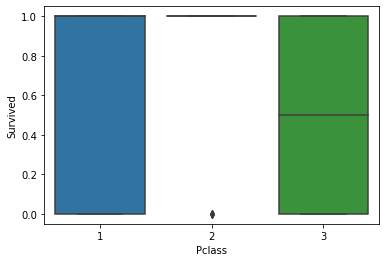

In [172]:
sns.boxplot(x=df_train['Pclass'],y=df_train['Survived'])

Pclass is not correlated with Survived. But based on the box plot, we see pClass = '3' has no outliers and has good interquartile range. Hence, this feature can be considered for prediction.

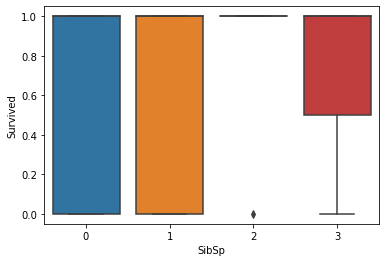

In [173]:
sns.boxplot(df_train['SibSp'],df_train['Survived'])

SibSp is similar to Pclass with one category having good interquartile range.

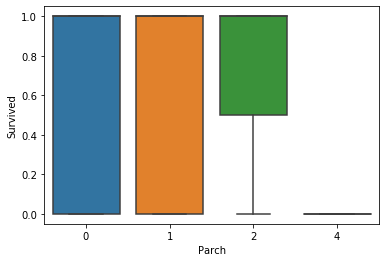

In [174]:
sns.boxplot(df_train['Parch'],df_train['Survived'])

Parch is similar to Pclass with one category having good interquartile range.

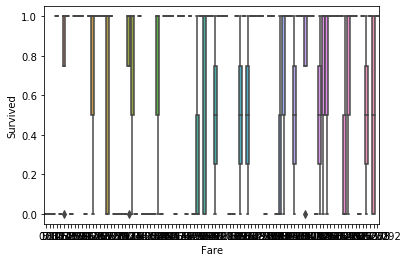

In [175]:
sns.boxplot(df_train['Fare'],df_train['Survived'])

Fare is not a good predictor since few ranges of fare seems to have a good quartile range and mean. While other ranges are either 0 or 1. This could result in incorrect predictions.

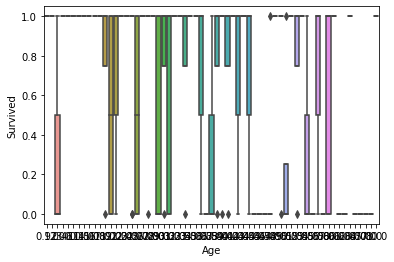

In [176]:
sns.boxplot(x=df_train['Age'],y=df_train['Survived'])

Age has few range which has good IQR while all others are zeros and ones in lower and upper extreme levels.

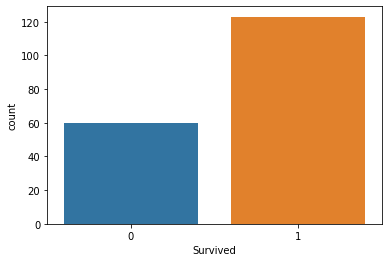

In [177]:
sns.countplot(df_train['Survived'])

The rate of survived and deceased is not equivalent but the category is not skewed. hence, scaling will not be required.

Based on the analysis, below columns are considered for prediction.
*  Pclass
*  SibSp
*  Sex
*  Parch

Since it is a pure classification problem, below algorithms can be implied and the model with best accuracy can be used for final prediction.
* KNN
* SVM
* Decision Tree
* Random forest
* Logistic regression


## Model Development 

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
import numpy as np

In [179]:
def model_fit(estimator,x,y,t,cv=None):
    
                                                
                                                model = estimator
                                                size,train_score,test_score = learning_curve(model,x,y,cv=cv)
                                                train_mean = np.mean(train_score,axis=1)
                                                train_std  = np.std(train_score,axis=1)
                                                test_mean  = np. mean(test_score,axis=1)
                                                test_std   = np.std(test_score,axis=1)
                                                plt.fill_between(size,train_mean - train_std,train_mean + train_std,alpha = 0.1)
                                                plt.fill_between(size,test_mean - test_std,test_mean + test_std,alpha = 0.1)
                                                plt.plot(size,train_mean,label='Training examples')
                                                plt.plot(size,test_mean,label='CV set')
                                                plt.title(t)
                                                plt.legend()
                                                

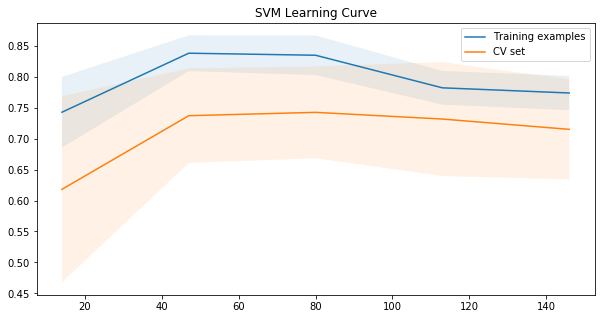

In [201]:
plt.figure(figsize=(10,5))


x = df_train[['Pclass','SibSp','Parch','sex']]
y = df_train['Survived']

# SVM

model_fit(svm.SVC(),x,y,'SVM Learning Curve')


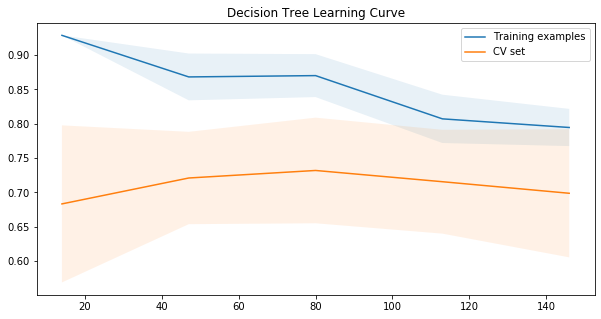

In [181]:
# Decision tree
plt.figure(figsize=(10,5))
model_fit(DecisionTreeClassifier(),x,y,'Decision Tree Learning Curve')

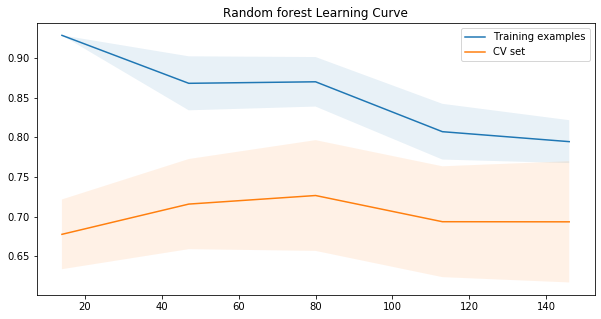

In [182]:
# Random Forest
plt.figure(figsize=(10,5))
model_fit(RandomForestClassifier(),x,y,'Random forest Learning Curve')

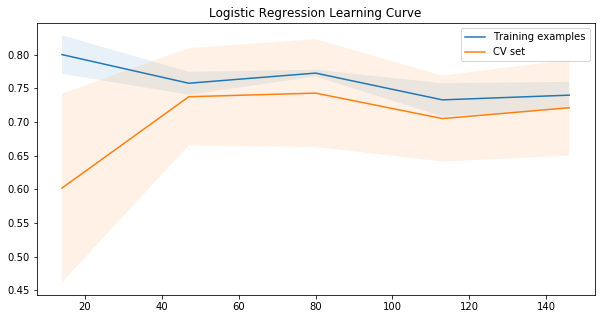

In [183]:
# Logistic regression
plt.figure(figsize=(10,5))
model_fit(LogisticRegression(),x,y,'Logistic Regression Learning Curve')

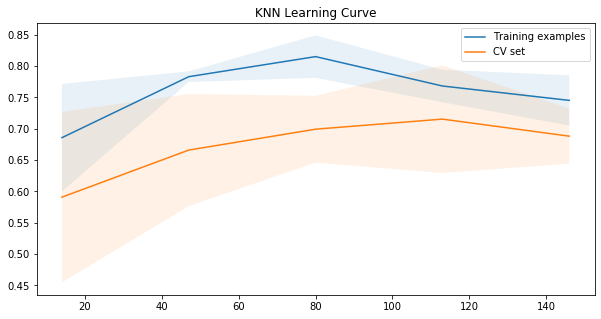

In [184]:
# KNN
plt.figure(figsize=(10,5))
model_fit(KNeighborsClassifier(),x,y,'KNN Learning Curve')

From the learning curves of each algorithm, below inferences have been obtained.

* SVM - better curve with no high bias or variance
* Decision tree - The gap between the ascending training curve and descending cv curve is bit large compared to SVM curve owing to high variance.
* Random Forest - The gap is higher than that of decision tree.
* Logistic Regression - better curve with no high bias/variance
* KNN - better curve with no high bias/variance

Hence, SVM and KNN algorithms are be used for further model development.

In [185]:
svm_model = svm.SVC().fit(x,y)
svm_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [186]:
knn_model = KNeighborsClassifier().fit(x,y)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [202]:
lr = LogisticRegression().fit(x,y)
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Model Evaluation

In [193]:
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_test = df_test.drop(columns=['Cabin','Age'])
df_test

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,0,0,359309,8.0500,S


In [190]:
df_test.shape

(418, 9)

In [194]:
df_test = df_test.reset_index()
df_test = df_test.drop(columns=['index'])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x = df_test['Sex']
df = pd.DataFrame(le.fit_transform(x),columns=['Sex'])
df_test['sex'] = df
cols = df_test[['Pclass','SibSp','Parch','sex']]
df_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,sex
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,S,0


In [195]:
df_test.describe()

,PassengerId,Pclass,SibSp,Parch,Fare,sex
count,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,0.447368,0.392344,35.627188,0.636364
std,120.810458,0.841838,0.896760,0.981429,55.907576,0.481622
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,0.000000,0.000000,14.454200,1.000000
75%,1204.750000,3.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,8.000000,9.000000,512.329200,1.000000


In [196]:
df_result = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
df_result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## SVM prediction and accuracy

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       266
           1       0.75      0.99      0.86       152

    accuracy                           0.88       418
   macro avg       0.87      0.90      0.87       418
weighted avg       0.91      0.88      0.88       418

Accuracy: 0.8779904306220095


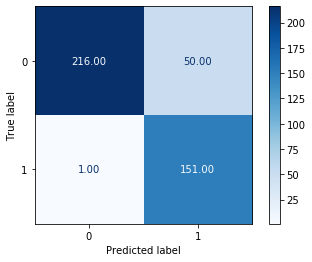

In [197]:
x_test = df_test[['Pclass','SibSp','Parch','sex']]
y_test = df_result['Survived']
yhat_svm = svm_model.predict(x_test)
from sklearn.metrics import classification_report,accuracy_score,plot_confusion_matrix
print(classification_report(y_test,yhat_svm))
print("Accuracy:",accuracy_score(y_test,yhat_svm))
plot_confusion_matrix(svm_model,x_test,y_test,cmap='Blues',values_format='0.2f')

## KNN prediction and accuracy

              precision    recall  f1-score   support

           0       0.99      0.58      0.73       266
           1       0.57      0.99      0.72       152

    accuracy                           0.72       418
   macro avg       0.78      0.78      0.72       418
weighted avg       0.84      0.72      0.73       418

Accuracy: 0.7248803827751196


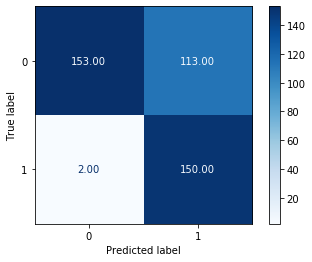

In [198]:
x_test = df_test[['Pclass','SibSp','Parch','sex']]
y_test = df_result['Survived']
yhat_knn = knn_model.predict(x_test)
from sklearn.metrics import classification_report,accuracy_score,plot_confusion_matrix
print(classification_report(y_test,yhat_knn))
print("Accuracy:",accuracy_score(y_test,yhat_knn))
plot_confusion_matrix(knn_model,x_test,y_test,cmap='Blues',values_format='0.2f')

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       266
           1       0.88      1.00      0.94       152

    accuracy                           0.95       418
   macro avg       0.94      0.96      0.95       418
weighted avg       0.96      0.95      0.95       418

Accuracy: 0.9497607655502392


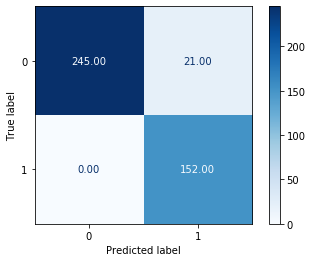

In [204]:
x_test = df_test[['Pclass','SibSp','Parch','sex']]
y_test = df_result['Survived']
yhat_lr = lr.predict(x_test)
ypred  = lr.predict_proba(x_test)
from sklearn.metrics import classification_report,accuracy_score,plot_confusion_matrix
print(classification_report(y_test,yhat_lr))
print("Accuracy:",accuracy_score(y_test,yhat_lr))
plot_confusion_matrix(lr,x_test,y_test,cmap='Blues',values_format='0.2f')

Based on the accuracy scores, logistic regression has better accuracy than KNN and SVM.

In [205]:
df_test_set['Survived'] = yhat_lr.astype(int)

In [206]:
df_test_set['PassengerId'] = df_test['PassengerId']
df_final = df_test_set[['PassengerId','Survived']]
df_final.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
df_final.to_csv (r'Titanic_submission.csv', index = True, header=True)